# Dashboard of  experiments in post silicon for WL affinity (SKX) SPEC 17

In [2]:
%matplotlib inline

import os
from pca.pca import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

,test_name,Kind,cpu_bound,cpi,branch_mispredict,retired_per_instr,upi_bw,fp_single_precision,fp_double_precision,fp_128_single_precision,fp_128_double_precision,l1_bound,l3_bound,store_bound
0,603.bwaves,0,94.284162,3.818923,0.001057,0.000008,21152.994060,1.390000e-11,3.123111e-01,0.000000e+00,1.468733e-02,-4.205635,5.442256,13.411818
1,605.mcf,1,0.964317,1.512149,0.057629,0.000060,8.238895,0.000000e+00,3.390000e-07,0.000000e+00,0.000000e+00,6.222513,14.371958,1.533234
2,607.cactuBSSN,0,77.195533,2.674158,0.001628,0.000009,17910.240590,0.000000e+00,4.174753e-01,0.000000e+00,6.753917e-03,0.346170,4.287639,7.516600
3,619.lbm,0,90.914885,13.383025,0.017104,0.000019,23699.588330,0.000000e+00,4.731024e-01,0.000000e+00,0.000000e+00,0.541483,4.535582,68.717235
4,620.omnetpp,1,0.954782,1.111146,0.021358,0.000036,10.735693,0.000000e+00,2.679180e-04,0.000000e+00,0.000000e+00,6.015967,21.241297,1.122861
5,621.wrf,0,96.285554,5.901676,0.011980,0.000023,22660.246970,9.540024e-02,5.100753e-02,1.242713e-01,2.270000e-07,12.462811,14.873351,6.566515
6,623.xalancbmk,1,0.951576,0.744193,0.003745,0.000043,11.145109,0.000000e+00,2.246770e-04,0.000000e+00,0.000000e+00,14.538320,7.591558,0.168916
7,625.x264,1,0.967152,0.343586,0.015708,0.000040,17.092555,2.960000e-05,3.740000e-06,0.000000e+00,0.000000e+00,3.793765,0.836290,0.676579
8,627.cam4,0,86.174586,2.877667,0.007226,0.000022,3167.019233,4.740000e-05,2.047354e-01,1.860000e-05,2.329045e-02,12.140095,2.845011,23.026134
9,628.pop2,0,85.821820,10.620347,0.007894,0.000043,2766.186525,0.000000e+00,2.270360e-02,0.000000e+00,8.624571e-02,5.317337,9.249450,0.531158


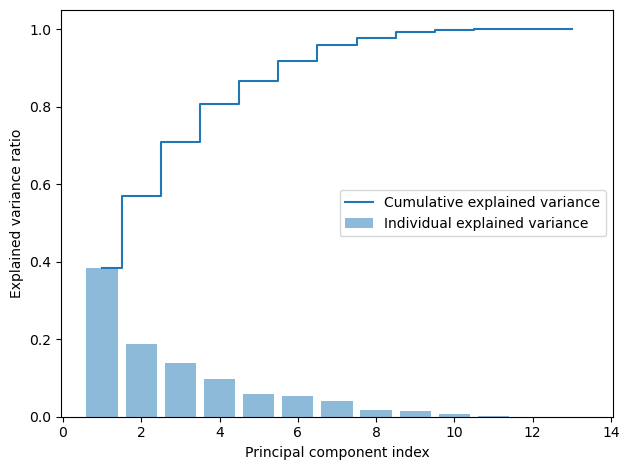

,principal component 1,principal component 2,test_name
0,2.424676,-0.935603,603.bwaves
1,-2.798825,0.975805,605.mcf
2,2.002061,-1.120907,607.cactuBSSN
3,4.097295,-1.323034,619.lbm
4,-2.105759,1.162030,620.omnetpp
5,2.308175,5.783405,621.wrf
6,-2.249394,0.367523,623.xalancbmk
7,-2.181661,-0.334630,625.x264
8,0.996577,-0.798814,627.cam4
9,1.103707,0.472192,628.pop2


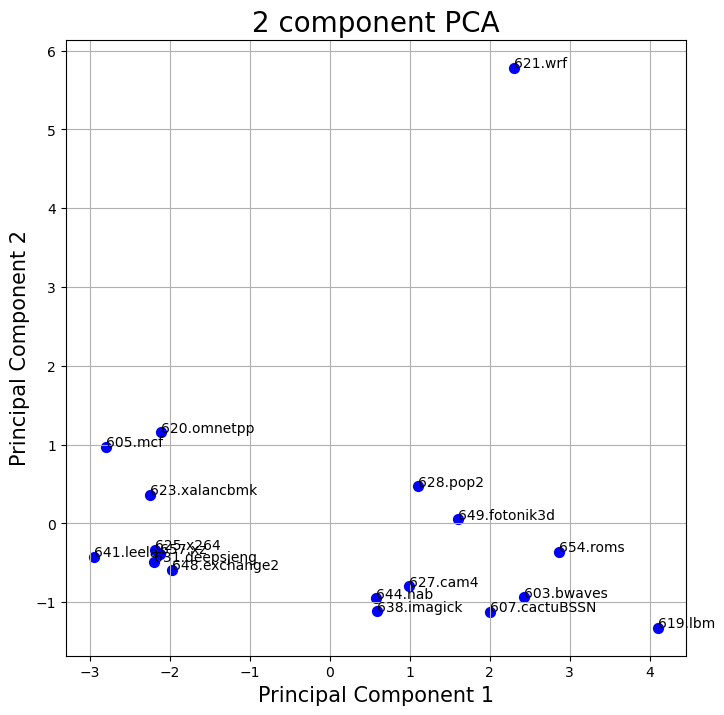

In [3]:
filename = 'post_silicon/summary.csv'
pca_df = None

if os.path.exists(filename):
    df = pd.read_csv(filename)
    df.fillna(0,inplace=True)
    display(df)
    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    
    #pca_df,eig_vals,eig_vecs = get_PCA(df, features, test_column)
    pca_df = get_PCA(df,features)
    x = get_features(df,features)
    X_std = StandardScaler().fit_transform(x)
    exp_var_pca = get_explained_variance(X_std)
    plot_explained_variance(exp_var_pca)
    plot_PCA_labeled(pca_df)
    display(pca_df)

else:
    print("Filename error")

#display(eig_vals)
#display(eig_vecs)

# Plot characteristics of the worklaods

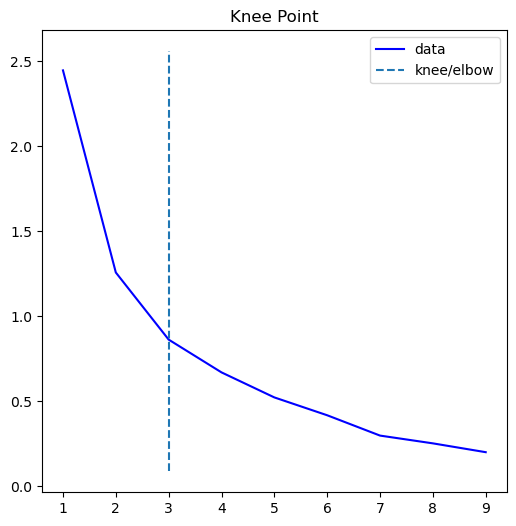

In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))


In [5]:
print(f'Optimal number of clusters = {clusters[0]}')

Optimal number of clusters = 3


## Clasification based on optimal number of clusters

,cluster,test_name,principal component 1,principal component 2
1,1,603.bwaves,2.424676,-0.935603
0,0,605.mcf,-2.798825,0.975805
1,1,607.cactuBSSN,2.002061,-1.120907
1,1,619.lbm,4.097295,-1.323034
0,0,620.omnetpp,-2.105759,1.162030
1,1,621.wrf,2.308175,5.783405
0,0,623.xalancbmk,-2.249394,0.367523
0,0,625.x264,-2.181661,-0.334630
1,1,627.cam4,0.996577,-0.798814
1,1,628.pop2,1.103707,0.472192


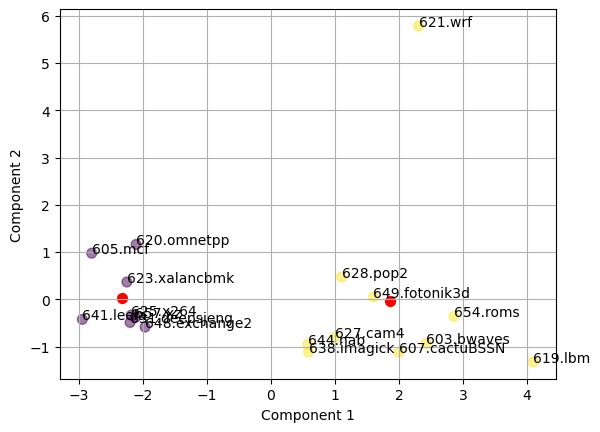

In [6]:
from clustering.clustering import *
df_result,kmeans = kmean_cluster(pca_df,2)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)
plot_kmeans_labeled(pca_df, kmeans)

# Get the test cases closer to centroid

In [6]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
6,6,-2.249394,0.367523,623.xalancbmk
5,5,2.308175,5.783405,621.wrf
2,2,2.002061,-1.120907,607.cactuBSSN


,test_name,Kind,cpu_bound,cpi,branch_mispredict,retired_per_instr,upi_bw,fp_single_precision,fp_double_precision,fp_128_single_precision,fp_128_double_precision,l1_bound,l3_bound,store_bound
2,607.cactuBSSN,0,77.195533,2.674158,0.001628,0.000009,17910.240590,0.0000,0.417475,0.000000,6.753917e-03,0.346170,4.287639,7.516600
5,621.wrf,0,96.285554,5.901676,0.011980,0.000023,22660.246970,0.0954,0.051008,0.124271,2.270000e-07,12.462811,14.873351,6.566515
6,623.xalancbmk,1,0.951576,0.744193,0.003745,0.000043,11.145109,0.0000,0.000225,0.000000,0.000000e+00,14.538320,7.591558,0.168916


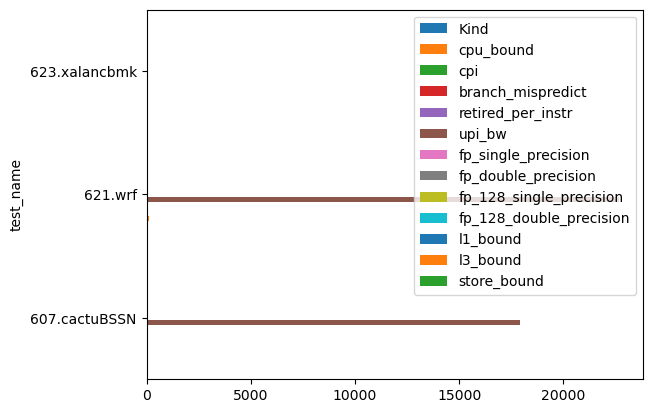

In [7]:
list_tests = df['test_name'].tolist()
df_global = pd.read_csv(filename)
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")
df2


## Clasification based on FP/INT clusters


In [8]:
df_result,kmeans = kmean_cluster(pca_df,2)
df_result

,PRED,test_name
0,0,605.mcf
0,0,620.omnetpp
0,0,623.xalancbmk
0,0,625.x264
0,0,631.deepsjeng
0,0,641.leela
0,0,648.exchange2
0,0,657.xz
1,1,603.bwaves
1,1,607.cactuBSSN


## Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}

    REAL      test_name
0      0     603.bwaves
1      1        605.mcf
2      0  607.cactuBSSN
3      0        619.lbm
4      1    620.omnetpp
5      0        621.wrf
6      1  623.xalancbmk
7      1       625.x264
8      0       627.cam4
9      0       628.pop2
10     1  631.deepsjeng
11     0    638.imagick
12     1      641.leela
13     0        644.nab
14     1  648.exchange2
15     0  649.fotonik3d
16     0       654.roms
17     1         657.xz
    Unnamed: 0  PRED      test_name
0            0     0        605.mcf
1            0     0    620.omnetpp
2            0     0  623.xalancbmk
3            0     0       625.x264
4            0     0  631.deepsjeng
5            0     0      641.leela
6            0     0  648.exchange2
7            0     0         657.xz
8            1     1     603.bwaves
9            1     1  607.cactuBSSN
10           1     1        619.lbm
11           1     1        621.wrf
12           1     1       627.cam4
13           1     1       628.pop2
14  

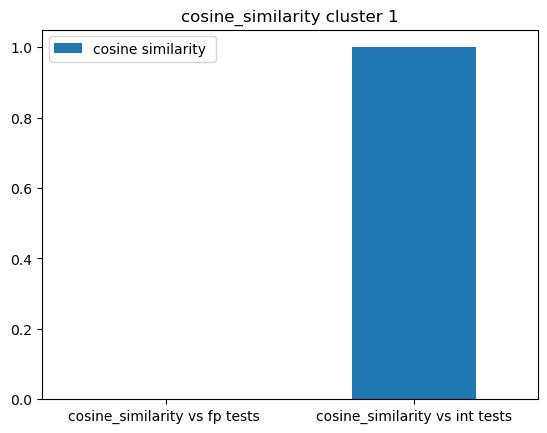

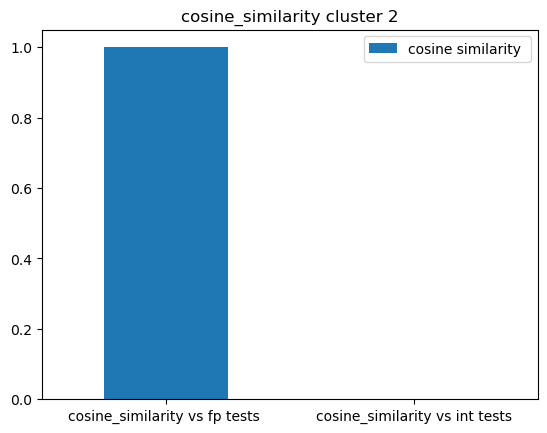

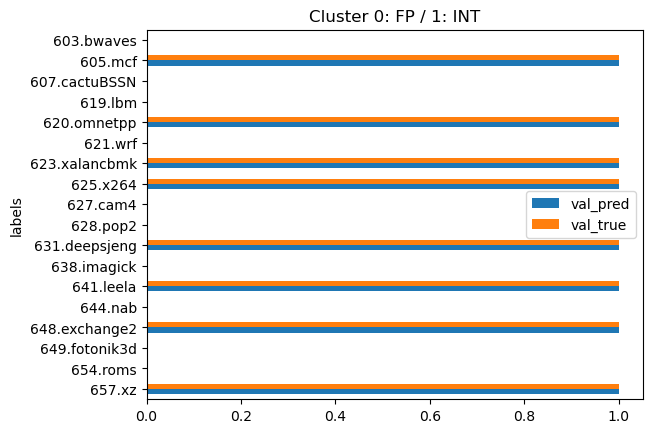

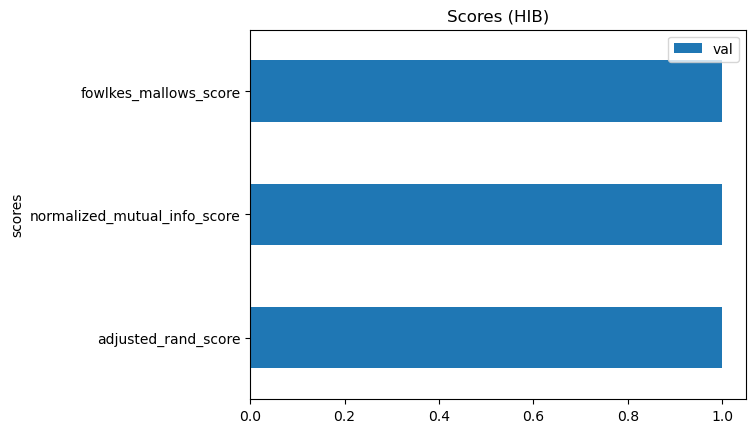

In [9]:
df = pd.read_csv("references/clusters_spec2017_clean.csv")
print(df)
df_sorted = df.sort_values(by='REAL')
fp_tests = df_sorted[df_sorted['REAL'] == 0]
int_tests = df_sorted[df_sorted['REAL'] == 1]

df = pd.read_csv("clusters.csv")
print(df)
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pd.read_csv("references/clusters_spec2017_clean.csv")
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["REAL"].tolist()


df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})

print()
print(df)

print()
print(df.loc[~(df['val_pred'] == df['val_true'])])


ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

## Use supervised ML to validate with testing and training data

In [8]:
pca_df['Kind'] = df[['Kind']].copy()

In [9]:
# Use known kind based on KMEANS prediction
X = pca_df[["principal component 1","principal component 2"]]
y = pca_df[["Kind"]]

accuracy_results = {}

In [10]:
from statistics import mean
from statistics import stdev
def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()
p_total_wpca,r_total_wpca,f_total_wpca = get_accuracty(X,y,loops,clf)
    
print(f"Precision score {mean(p_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"Recall score {mean(r_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"F-beta score {mean(f_total_wpca)} STED {stdev(p_total_wpca)}")

accuracy_results['Decision_Tree_precision_score_wpca'] = mean(p_total_wpca)
accuracy_results['Decision_Tree_recall_score_wpca'] = mean(r_total_wpca)
accuracy_results['Decision_Tree_F_score_wpca'] = mean(f_total_wpca)

Precision score 1.0 STED 0.0
Recall score 1.0 STED 0.0
F-beta score 1.0 STED 0.0


,algorithm,accuracy
0,Decision_Tree_precision_score_wpca,1.0
1,Decision_Tree_recall_score_wpca,1.0
2,Decision_Tree_F_score_wpca,1.0


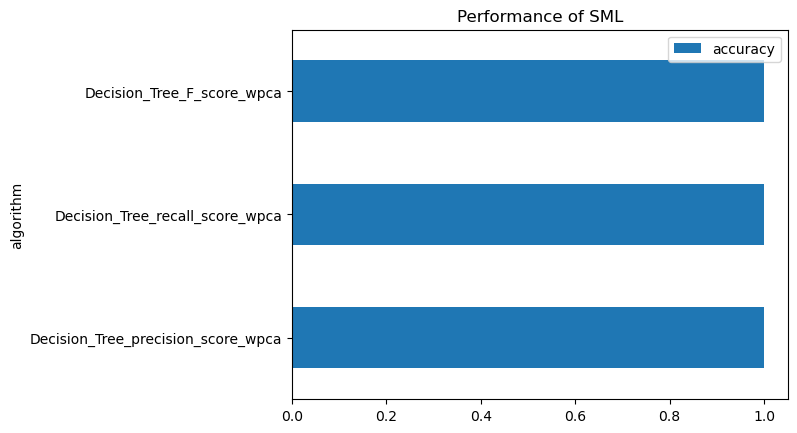

In [11]:
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
#ccuracy_results_df = accuracy_results_df.drop([0,2])
#isplay(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Performance of SML');